This needs to be corrected. many cells with all mice analysis has been remo

In [ ]:
from os.path import join
import sys
import glob

import matplotlib.pyplot as plt
import numpy as np
# for slope calculation
from scipy.stats import linregress
from scipy.stats import ttest_ind
import seaborn as sns
# sns.set(font_scale = 1.5)
sns.set_context("talk")
import pandas as pd

%matplotlib inline

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from google.colab import drive
drive.mount('/content/drive')

save_dir = '/content/drive/Shareddrives/TuriLab/Data/PTSD_project/!analysis/saveFolder/'

Mounted at /content/drive


In [ ]:
def filler(row):
  """fills in the field according to the content 
  of a dictionary"""
  for key in cond_dict.keys():
    if row == key:
      val = cond_dict[key]
  return val

To creat the `stim_interval_freezing` i loaded the sefla trials in freezview5 and set up an export with custom intervals. the intervals can be found in `sefla_shock_sequence` sheet. i used .5s bouts. 

In [ ]:
worksheet = gc.open('Copy of stim_interval_freezing_w_ELS').sheet1

# get_all_values gives a list of rows.
data = worksheet.get_all_values()
# print(data)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(data)
df.columns = df.iloc[0]
df.drop(df.index[0], inplace =True)
df.reset_index(inplace=True, drop=True)


# converting number strings to number
df[["pre", "shock01", "shock02", "shock03",
       "shock04", "shock05", "shock06",
       "shock07", "shock08", "shock09",
       "shock10"]] = df[["pre", "shock01", "shock02", "shock03",
       "shock04", "shock05", "shock06",
       "shock07", "shock08", "shock09",
       "shock10"]].apply(pd.to_numeric)

df['cohort_id'] = df['cohort']+'_'+df['id']
# dropping two ambigous columns
df.drop(['cohort', 'id'], axis=1, inplace=True)

df.head()
# df.shape

,group,els,sex,genotype,pre,shock01,shock02,shock03,shock04,shock05,shock06,shock07,shock08,shock09,shock10,cohort_id
0,Control,n,Male,wt,0.46,3.08,7.83,2.70,2.70,0.75,5.87,2.04,3.67,4.71,3.85,ptsd2_81
1,Control,n,Male,wt,2.20,7.32,5.78,6.37,8.28,13.89,12.86,8.15,7.91,12.19,13.84,ptsd2_82
2,Control,n,Male,wt,0.55,2.09,2.40,4.05,1.67,2.48,2.42,2.96,1.39,4.34,1.93,ptsd2_91
3,Control,n,Male,wt,0.00,1.35,6.41,1.57,1.02,1.51,1.57,0.61,2.47,0.45,2.89,ptsd2_92
4,Control,n,Male,wt,0.00,2.71,0.71,3.00,7.16,6.14,1.11,3.98,4.62,12.64,8.66,ptsd3_12


In [ ]:
worksheet = gc.open('id_dob').sheet1

# get_all_values gives a list of rows.
data = worksheet.get_all_values()
# print(data)

# Convert to a DataFrame and render.
import pandas as pd
dob_df = pd.DataFrame.from_records(data)
dob_df.columns = dob_df.iloc[0]
dob_df.drop(dob_df.index[0], inplace=True)
dob_df.reset_index(inplace=True, drop=True)

dob_df['cohort_id']= dob_df['cohort']+'_'+dob_df['id']
dob_df.drop(['id', 'cohort'], axis=1, inplace=True )
dob_df['dob'] = dob_df['dob'].astype('datetime64[ns]')

dob_df.head()
print(f'dob_df shape{dob_df.shape}')

dob_df shape(147, 2)


merging freezing with DOB-s. Although this is not necessary bc we will not use this info later on. 

In [ ]:
merged_df = df.merge(dob_df,left_on='cohort_id', right_on='cohort_id')
merged_df

,group,els,sex,genotype,pre,shock01,shock02,shock03,shock04,shock05,shock06,shock07,shock08,shock09,shock10,cohort_id,dob
0,Control,n,Male,wt,0.46,3.08,7.83,2.70,2.70,0.75,5.87,2.04,3.67,4.71,3.85,ptsd2_81,2021-02-16
1,Control,n,Male,wt,2.20,7.32,5.78,6.37,8.28,13.89,12.86,8.15,7.91,12.19,13.84,ptsd2_82,2021-02-16
2,Control,n,Male,wt,0.55,2.09,2.40,4.05,1.67,2.48,2.42,2.96,1.39,4.34,1.93,ptsd2_91,2021-02-16
3,Control,n,Male,wt,0.00,1.35,6.41,1.57,1.02,1.51,1.57,0.61,2.47,0.45,2.89,ptsd2_92,2021-02-16
4,Control,n,Male,wt,0.00,2.71,0.71,3.00,7.16,6.14,1.11,3.98,4.62,12.64,8.66,ptsd3_12,2021-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Control,y,Female,wt,0.00,0.62,31.94,1.57,4.74,7.21,4.70,4.89,12.52,7.85,3.13,els1_868-2,2021-10-18
125,Control,y,Female,wt,0.00,2.58,15.93,14.54,6.98,18.84,8.09,22.73,27.70,5.98,45.37,els1_868-3,2021-10-18
126,Control,n,Female,wt,0.00,2.58,6.76,5.10,1.67,3.55,1.76,5.71,4.68,9.05,1.20,els1_921-2,2021-10-25
127,Control,n,Female,wt,1.65,4.37,6.76,3.37,16.93,4.84,1.31,21.30,35.48,7.11,43.32,els1_921-3,2021-10-25


Filtering out the mice for the ELS project

In [ ]:
# age_matched_controls = ['ptsd3_2', 'ptsd3_12',
#        'ptsd3_1', 'ptsd3_3', 'ptsd3_11', 'ptsd5_11', 'ptsd5_61',
#        'ptsd5_12', 'ptsd5_13', 'ptsd5_64', 'ptsd5_62'] #'ptsd1_sert26a-3', 'ptsd1_sert26a-2', 

# els_mice = df[df['cohort_id'].str.startswith('els1')]
# print(f'els mice: {els_mice.shape}')

# age_matched_mice = df[df['cohort_id'].isin(age_matched_controls)]
# print(f'age matched mice: {age_matched_mice.shape}')

# els_age_matched = pd.concat([els_mice, age_matched_mice], axis=0)
# print(f'els and age matched: {els_age_matched.shape}')
# els_age_matched.head()

###################################
# saving this as a csv for further#
# analysis.                       #
###################################
# els_age_matched.to_csv(os.path.join(save_dir, 'els_and_age_matched_mice.csv'))

els mice: (42, 16)
age matched mice: (11, 16)
els and age matched: (53, 16)


Filtering out non-ELS mice for analysis

In [ ]:
non_els = merged_df[merged_df['els']== 'n']

# saving: 
# non_els.to_csv(join(save_dir, 'noELS', 'DATA', 'IS_interval_freezing_no_ELS.csv'))

In [ ]:
print(f'all mice: {els_age_matched.cohort_id.nunique()}')
print(f'\n ================ \n')
print('els mice \n {}'.format(els_age_matched.groupby('els')['cohort_id'].nunique()))
print(f'\n ================ \n')
print('els mice \n {}'.format(els_age_matched.groupby(['els', 'group'])['cohort_id'].nunique()))
print(f'\n ================ \n')
print(els_age_matched.groupby('group')['cohort_id'].nunique())
print(f'\n ================ \n')
print(els_age_matched.groupby(['group', 'sex'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(els_age_matched.groupby(['group', 'genotype'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(els_age_matched.groupby(['group', 'els'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(els_age_matched.groupby(['group', 'els', 'sex'])['cohort_id'].nunique())


Melting the df to the long form

In [ ]:
df = non_els
df = pd.melt(df, id_vars=['cohort_id', 'group', 'sex', 'genotype', 'els',
                                 'dob'],
                    value_vars=df.columns[4:-1])

# renaming one column
df.rename(columns={0: "condition", 'value': 'freezing(%)'},
                 inplace=True)
df

#############################
#saving the data on disk as #
# as a CSV. uncomment if you# 
# need                      #
#############################


# df.to_csv(join(join(save_dir, 'noELS', 'DATA',
#                            'IS_interval_freezing_no_ELS_long.csv')))

,cohort_id,group,sex,genotype,els,dob,condition,freezing(%)
0,ptsd2_81,Control,Male,wt,n,2021-02-16,pre,0.46
1,ptsd2_82,Control,Male,wt,n,2021-02-16,pre,2.20
2,ptsd2_91,Control,Male,wt,n,2021-02-16,pre,0.55
3,ptsd2_92,Control,Male,wt,n,2021-02-16,pre,0.00
4,ptsd3_12,Control,Male,wt,n,2021-01-03,pre,0.00
...,...,...,...,...,...,...,...,...
1084,els1_936-1,SEFL,Female,wt,n,2021-10-26,shock10,74.25
1085,els1_936-2,SEFL,Female,wt,n,2021-10-26,shock10,89.89
1086,els1_921-2,Control,Female,wt,n,2021-10-25,shock10,1.20
1087,els1_921-3,Control,Female,wt,n,2021-10-25,shock10,43.32


adding time column to df 

In [ ]:
# constructing dictionary with numerical values that replace the strings
conditions = df['condition'].unique()
times = np.arange(0, 3600, 350)
cond_dict = dict(zip(conditions, times))
# adding an empty column
df['time'] = df['condition'].apply(filler)

In [ ]:
df.head()

,cohort_id,group,sex,genotype,els,dob,condition,freezing(%),time
0,ptsd2_81,Control,Male,wt,n,2021-02-16,pre,0.46,0
1,ptsd2_82,Control,Male,wt,n,2021-02-16,pre,2.20,0
2,ptsd2_91,Control,Male,wt,n,2021-02-16,pre,0.55,0
3,ptsd2_92,Control,Male,wt,n,2021-02-16,pre,0.00,0
4,ptsd3_12,Control,Male,wt,n,2021-01-03,pre,0.00,0


In [ ]:
print(f'all mice: {len(melted_df.cohort_id.unique())}')
print(f'\n ================ \n')
print(melted_df.groupby('group')['cohort_id'].nunique())
print(f'\n ================ \n')
print(melted_df.groupby(['group', 'sex'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(melted_df.groupby(['group', 'genotype'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(melted_df.groupby(['group', 'els'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(melted_df.groupby(['group', 'els', 'sex'])['cohort_id'].nunique())

Text(0.5, 1.0, 'Inter-shock interval freezing N=85')

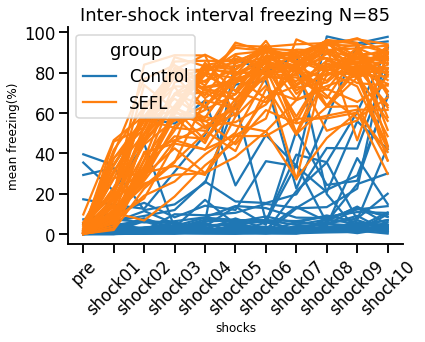

In [ ]:
# selected mice broken down to SEFL and CONTROL
plt.figure()
df = df[df['genotype']=='wt']

g = sns.lineplot(data=df, x='condition', y='freezing(%)', hue='group', 
                 units='cohort_id', estimator=None)
sns.despine()
plt.setp(g.get_xticklabels(), rotation=45)
plt.xlabel('shocks', size=12)
plt.ylabel('mean freezing(%)', size=12)
plt.title("Inter-shock interval freezing N={}".format(len(df.cohort_id.unique())))
# plt.savefig(os.path.join(savedir, 'IS_freezing_allmice_grouped.png'),
#             transparent=True, dpi=300, figsize = (8,6))

([<matplotlib.lines.Line2D at 0x7f5f77644e10>,
 ['group', 'Control', 'SEFL', 'genotype', 'wt'])

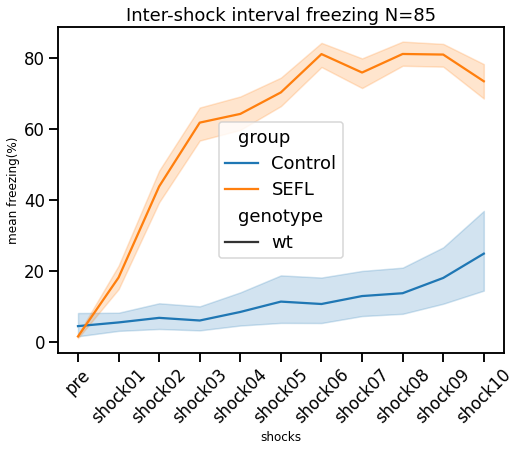

In [ ]:
plt.figure(figsize = (8,6))
g = sns.lineplot(data=df, x='condition', y='freezing(%)',
             hue='group', style='genotype')
plt.setp(g.get_xticklabels(), rotation=45)
plt.xlabel('shocks', size=12)
plt.ylabel('mean freezing(%)', size=12)
num_mice = df.cohort_id.nunique()
plt.title("Inter-shock interval freezing N={}".format(num_mice))
g.get_legend_handles_labels({})
# plt.savefig(os.path.join(savedir, 'IS_freezing_per_genotype_grouped_03_02.png'),
#             transparent=True, dpi=300)

([<matplotlib.lines.Line2D at 0x7f5f7758d710>,
 ['group', 'Control', 'SEFL', 'sex', 'Male', 'Female'])

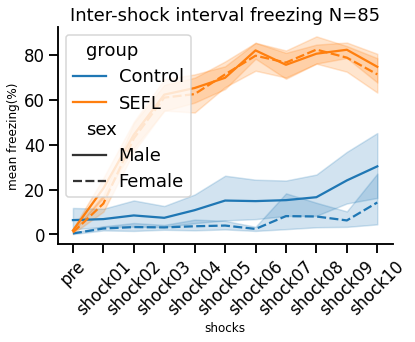

In [ ]:
# all mice broken down to SEFL-CONTROL and ELS
g = sns.lineplot(data=df, x='condition', y='freezing(%)',
             hue='group', style='sex')
sns.despine()
plt.setp(g.get_xticklabels(), rotation=45)
plt.xlabel('shocks', size=12)
plt.ylabel('mean freezing(%)', size=12)
plt.title("Inter-shock interval freezing N={}".format(df.cohort_id.nunique()))
g.get_legend_handles_labels({})
# plt.savefig(join(save_dir, 'IS_freezing_groupedby_sex_5_1.png'),
#             transparent=True, dpi=300, figsize = (8,6), bbox_inches='tight')

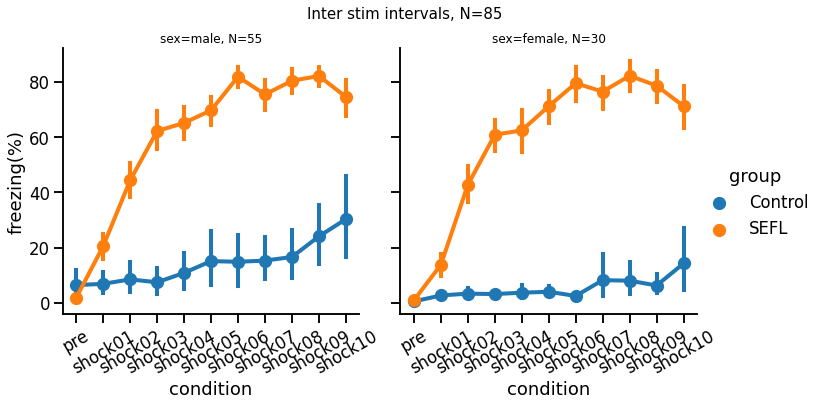

In [ ]:
# all mice broken down to SEFL-CONTROL and sex ELS included!!!
mice = len(df.cohort_id.unique())
females = df.groupby(['sex'])['cohort_id'].nunique().get('Female')
males = df.groupby(['sex'])['cohort_id'].nunique().get('Male')
# plt.figure(figsize = (15,8))
num_sexes = df.groupby(['sex'])['cohort_id'].nunique()
num_mice = df.cohort_id.nunique()

g = sns.catplot(data= df, x='condition', y='freezing(%)',
                  hue='group', col='sex', kind='point')
ax1= g.facet_axis(0,0)
ax1.set_title(label=f'sex=male, N={males}', fontdict={'fontsize': 12})
ax2= g.facet_axis(0,1)
ax2.set_title(label=f'sex=female, N={females}', fontdict={'fontsize': 12})

g.fig.suptitle(f'Inter stim intervals, N={mice}', y=1.03,fontsize=15)
g.set_xticklabels(rotation = 30)
# plt.savefig(os.path.join(savedir, 'IS_freezing_allmice_grouped_by_sex_03_02.png'),
#             transparent=True, dpi=300)

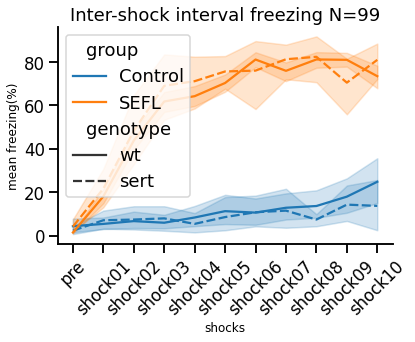

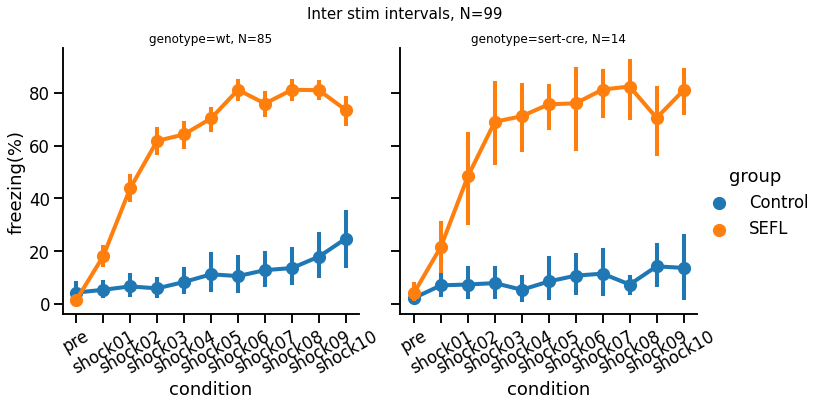

In [ ]:
# Here make sure to reset df to the all the mice. 
mice = len(df.cohort_id.unique())
wt = wt = df.groupby(['genotype'])['cohort_id'].nunique().get('wt')
sert = df.groupby(['genotype'])['cohort_id'].nunique().get('sert')

g = sns.lineplot(data=df, x='condition', y='freezing(%)',
             hue='group', style='genotype')
sns.despine()
plt.setp(g.get_xticklabels(), rotation=45)
plt.xlabel('shocks', size=12)
plt.ylabel('mean freezing(%)', size=12)

plt.title("Inter-shock interval freezing N={}".format(df.cohort_id.nunique()))
g.get_legend_handles_labels({})
# plt.savefig(join(save_dir, 'IS_freezing_groupedby_sex_5_1.png'),
#             transparent=True, dpi=300, figsize = (8,6), bbox_inches='tight')
# plt.figure(figsize = (15,8))
g = sns.catplot(data= df, x='condition', y='freezing(%)',
                  hue='group', col='genotype', kind='point')
ax1= g.facet_axis(0,0)
ax1.set_title(label=f'genotype=wt, N={wt}', fontdict={'fontsize': 12})
ax2= g.facet_axis(0,1)
ax2.set_title(label=f'genotype=sert-cre, N={sert}', fontdict={'fontsize': 12})

g.fig.suptitle(f'Inter stim intervals, N={mice}', y=1.03,fontsize=15)
g.set_xticklabels(rotation = 30)

# plt.savefig(os.path.join(savedir, 'IS_freezing_grouped_by_genotype_03_02.png'),
#             transparent=True, dpi=300)

Calculatig learning rate based on slope between pre and shock06 

In [ ]:
df.head()

,cohort_id,group,sex,genotype,els,dob,condition,freezing(%)
0,ptsd2_81,Control,Male,wt,n,2021-02-16,pre,0.46
1,ptsd2_82,Control,Male,wt,n,2021-02-16,pre,2.20
2,ptsd2_91,Control,Male,wt,n,2021-02-16,pre,0.55
3,ptsd2_92,Control,Male,wt,n,2021-02-16,pre,0.00
4,ptsd3_12,Control,Male,wt,n,2021-01-03,pre,0.00


unmelting the darn thing

In [ ]:
# df = 

wide_df = df.pivot(index= ['cohort_id', 'group', 'sex', 'genotype','els','dob'],
                columns='condition', values='freezing(%)')
wide_df

,,,,,condition,pre,shock01,shock02,shock03,shock04,shock05,shock06,shock07,shock08,shock09,shock10
cohort_id,group,sex,genotype,els,dob,,,,,,,,,,,
els1_921-2,Control,Female,wt,n,2021-10-25,0.00,2.58,6.76,5.10,1.67,3.55,1.76,5.71,4.68,9.05,1.20
els1_921-3,Control,Female,wt,n,2021-10-25,1.65,4.37,6.76,3.37,16.93,4.84,1.31,21.30,35.48,7.11,43.32
els1_921-4,Control,Female,wt,n,2021-10-25,0.18,5.84,11.39,5.17,3.81,13.56,4.57,50.97,24.35,26.40,69.07
els1_927-1,Control,Male,wt,n,2021-10-21,35.41,21.34,44.75,3.07,5.77,86.76,80.42,88.18,19.80,1.87,2.05
els1_927-2,Control,Male,wt,n,2021-10-21,29.28,32.72,11.83,14.69,25.40,65.02,6.53,39.35,35.61,60.43,92.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ptsd9_30-2,Control,Male,wt,n,2021-10-13,17.23,14.49,12.54,30.88,49.21,74.06,75.85,22.53,57.43,93.64,95.43
ptsd9_30-5,Control,Male,wt,n,2021-10-13,0.36,2.22,2.58,0.97,5.49,0.65,0.65,12.74,13.35,22.51,93.03
ptsd9_31-1,SEFL,Male,wt,n,2021-10-13,0.82,37.70,52.14,80.43,68.74,88.27,81.85,88.99,63.57,83.40,81.85


In [ ]:
# using shock06 as a second time point
wide_df['x'] = wide_df.apply(lambda row: [0.0,100.0], axis=1)
wide_df['y'] = wide_df.apply(lambda row: [row.pre, row.shock06], axis=1)

# calculating slopes
wide_df['slope_pre_shock06'] = wide_df.apply(lambda row: linregress(row.x, row.y)[0], axis=1)

In [ ]:
wide_df.head(2)

,,,,,condition,pre,shock01,shock02,shock03,shock04,shock05,shock06,shock07,shock08,shock09,shock10,x,y,slope_pre_shock06
cohort_id,group,sex,genotype,els,dob,,,,,,,,,,,,,,
els1_921-2,Control,Female,wt,n,2021-10-25,0.00,2.58,6.76,5.10,1.67,3.55,1.76,5.71,4.68,9.05,1.20,"[0.0, 100.0]","[0.0, 1.76]",0.0176
els1_921-3,Control,Female,wt,n,2021-10-25,1.65,4.37,6.76,3.37,16.93,4.84,1.31,21.30,35.48,7.11,43.32,"[0.0, 100.0]","[1.65, 1.31]",-0.0034


In [69]:
temp_df = wide_df.reset_index()
long_df = pd.melt(temp_df, id_vars=['cohort_id', 'group', 'sex', 'els', 'dob',
                                    'genotype'], 
                  value_name='slope', value_vars='slope_pre_shock06')
long_df.drop('condition', inplace=True, axis=1)

# saving
# long_df.to_csv(join(save_dir, 'noELS', 'DATA', 'Learing_slopes_pre_sock06.csv'))

### TODO: calculate freezing in SEFLB (although it is pretty short)